# Big Ideas Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Criteria for finding best neighborhood

4 main categories:
- Fire
- Crime
- Affordablity
- Mobility


In [2]:
# Weights for each category (custom per user)
weights = {
    "fire": 10,
    "affordability": 10,
    "crime": 20,
    "mobility": 5
}

# Grading function

def normalize_dict_values(d):
    max_value = max(d.values(), default=0)
    return {key: 1 - (value / max_value) for key, value in d.items()}

### How grading works



For each category, we assign a weight that determines how important we deem that category to be. This is meant for the user of this notebook to come up with their own scales
since we know that different people value different things.

We then use a grading function which normalizes the values out of 1, with the "best" being 1 and the "worst" being 0. We can then average them together and multiply by the weights to get a final score.

In [3]:
# Neighborhoods
nb_data = pd.read_csv("./neighborhoods.csv", low_memory=False)

nb_data.columns



Index(['_id', 'objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'pghdb_sde_neighborhood_2010_area', 'perimeter',
       'neighbor', 'neighbor_i', 'hood', 'hood_no', 'acres', 'sqmiles',
       'dpwdiv', 'unique_id', 'sectors', 'shape_le_1', 'shape_ar_1',
       'page_number', 'plannerassign', 'globalid', 'created_user',
       'created_date', 'last_edited_user', 'last_edited_date', 'temp',
       'shape_area', 'shape_length'],
      dtype='object')

In [4]:
neighborhoods = nb_data["hood"].unique()

In [5]:
len(neighborhoods)

90

# Fire Data

In [6]:
fire_data = pd.read_csv("./fire-data.csv")


In [7]:
# Columns
fire_data.columns

Index(['_id', 'call_no', 'incident_type', 'type_description', 'address',
       'alarms', 'alarm_time', 'primary_unit', 'census_tract', 'neighborhood',
       'council_district', 'ward', 'tract', 'public_works_division',
       'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude'],
      dtype='object')

Lets see 

In [8]:
fire_nbs = fire_data["neighborhood"].unique()[1:]
fire_nbs

array(['Fineview', 'Fairywood', 'South Side Flats', 'Allegheny Center',
       'Lincoln-Lemington-Belmar', 'Carrick', 'Beechview', 'Allentown',
       'Beltzhoover', 'Crafton Heights', 'Homewood North',
       'Squirrel Hill South', 'Perry North', 'Bedford Dwellings',
       'Homewood South', 'East Allegheny', 'Crawford-Roberts', 'Sheraden',
       'Middle Hill', 'Strip District', 'East Hills', 'Garfield',
       'Greenfield', 'North Shore', 'Spring Hill-City View',
       'Central Business District', 'Upper Hill', 'Manchester',
       'Overbrook', 'Polish Hill', 'Central Lawrenceville', 'Brookline',
       'Marshall-Shadeland', 'North Oakland', 'South Oakland',
       'Homewood West', 'East Liberty', 'Hazelwood',
       'Squirrel Hill North', 'Friendship', 'West Oakland',
       'Terrace Village', 'Brighton Heights', 'Troy Hill', 'Windgap',
       'Knoxville', 'Upper Lawrenceville', 'Arlington', 'Elliott',
       'South Side Slopes', 'Bloomfield', 'Perry South',
       'Central Norths

In [9]:
# Filter out confined fires (smaller fires)
fire_data = fire_data[fire_data["type_description"].str.contains("confined")==False]

In [10]:
# Load population data

pop_data = pd.read_csv("./population-data.csv")
pop_data.columns

Index(['_id', 'Neighborhood', '2010_Total_Population',
       '2010_OneRace_Population', '2010_White_Alone_Population',
       '2010_Black_Alone_Population',
       '2010_American_Indian_and_Alaska_Native_alone_population',
       '2010_Asian_Alone_Population',
       '2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio',
       '2010_Any_other_single_race_alone_Popualtion',
       '2010_Population_two_or_more_races',
       '2010_Hispanic_or_Latino_Population', '2020_Total_Population',
       '2020_OneRace_Population', '2020_White_Alone_Population',
       '2020_Black_Alone_Population',
       '2020_American_Indian_and_Alaska_Native_alone_population',
       '2020_Asian_Alone_Population',
       '2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio',
       '2020_Any_other_single_race_alone_Popualtion',
       '2020_Population_two_or_more_races',
       '2020_Hispanic_or_Latino_Population',
       'Change_2010_to_2020_Total_Population',
       'Change_2010_to_20

In [11]:
# Getting number of fire incidents per neighborhood
from collections import OrderedDict
data = {}
data_per_capita = {}

normalized_neighborhoods = list(set(neighborhoods).intersection(set(pop_data["Neighborhood"])))
for n in normalized_neighborhoods:
    population = pop_data.loc[pop_data["Neighborhood"] == n]["2020_Total_Population"].values[0]
    data[n] = fire_data.loc[fire_data["neighborhood"] == n].shape[0]
    data_per_capita[n] = data[n] / population



data = OrderedDict(sorted(data.items(), key=lambda item: item[1]))
data_per_capita = OrderedDict(sorted(data_per_capita.items(), key=lambda item: item[1]))


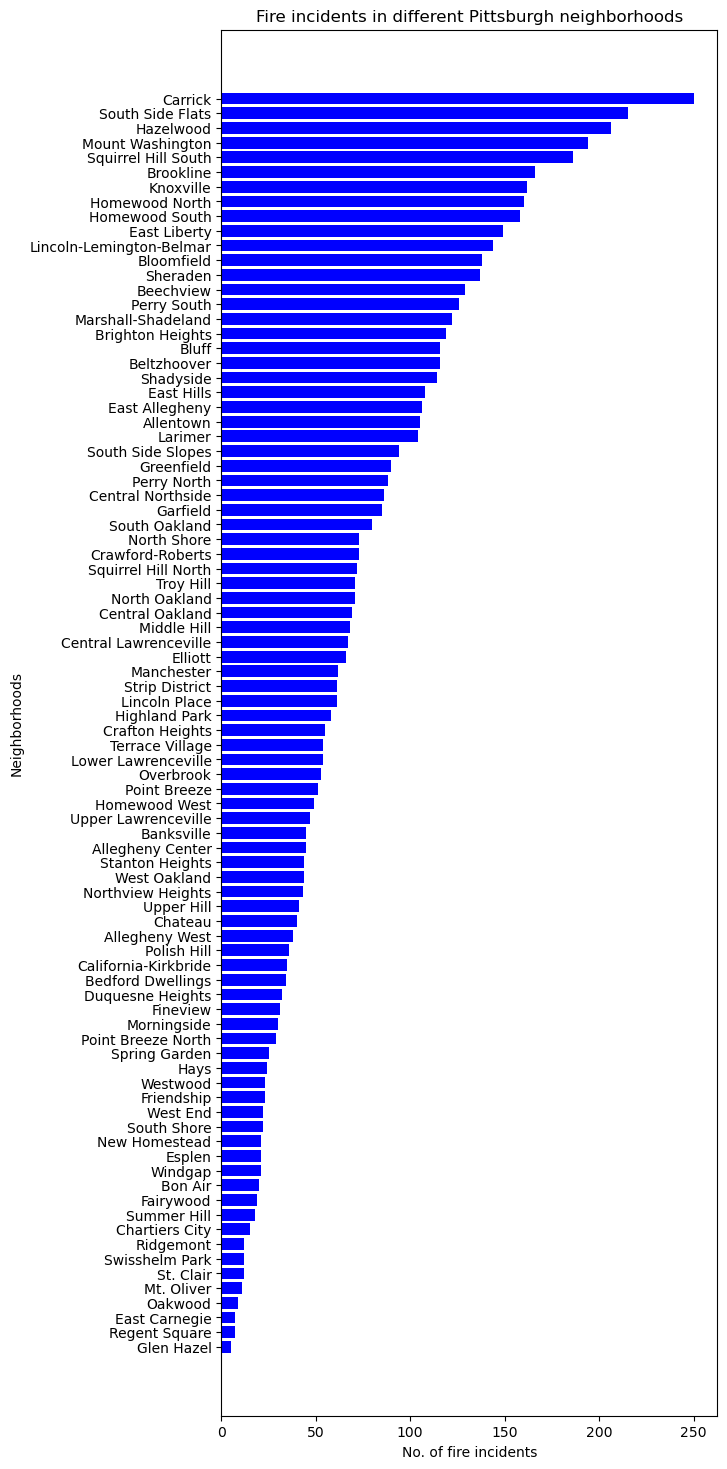

In [12]:
plt.figure().set_figheight(18)

neighborhoods = list(data.keys())
numOfIncidents = list(data.values())

plt.barh(neighborhoods, numOfIncidents, color = "blue" )

plt.ylabel("Neighborhoods")
plt.xlabel("No. of fire incidents")
plt.title("Fire incidents in different Pittsburgh neighborhoods")
plt.show()

Now it would be easy to just take this data and make conclusions but it is important to consider context. Here's a recalculated bar chart with population size taken into account.

Neighborhoods with larger populations are going to have more housing/people and therefore naturally more fires. This does not mean that the neighborhood is more prone to fires however and is not a good indicator by itself.

<Figure size 500x480 with 0 Axes>

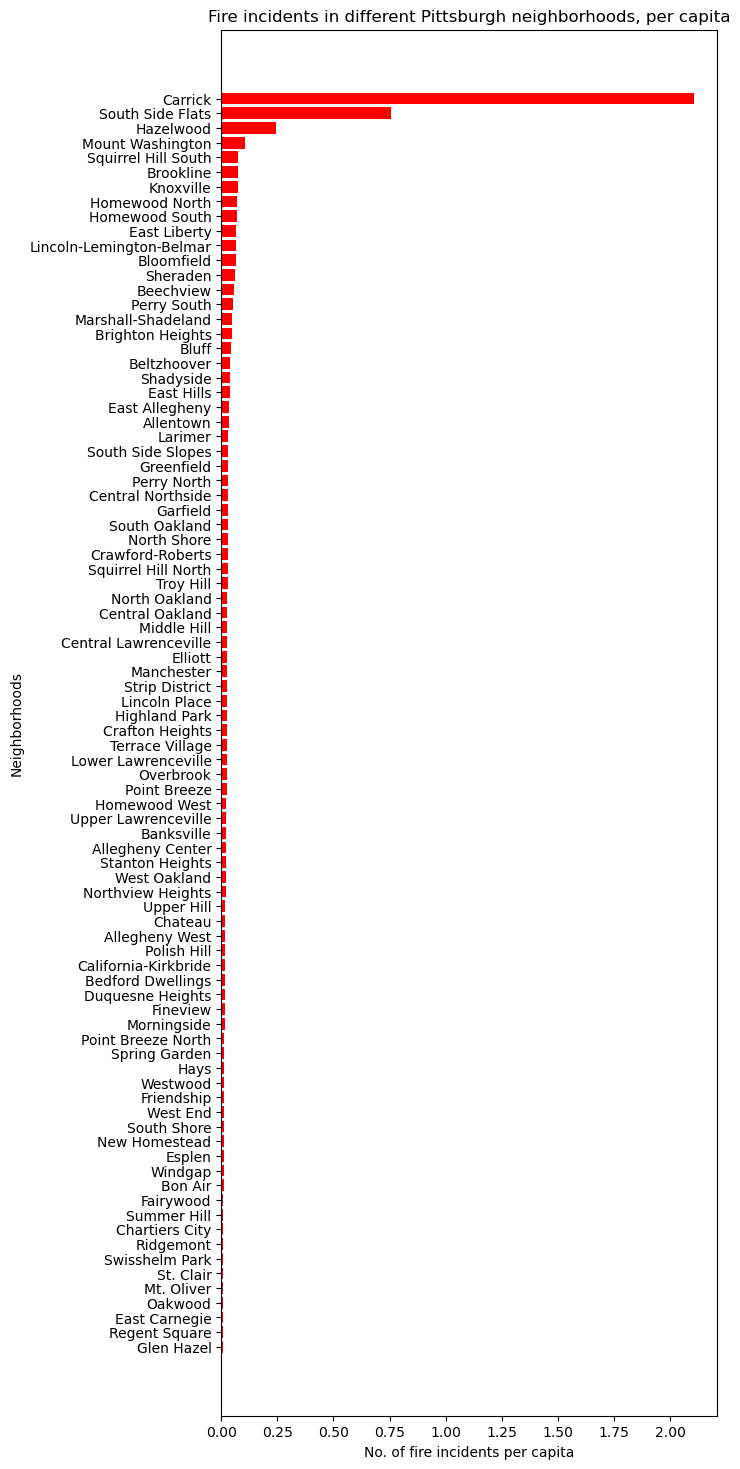

In [13]:
plt.figure().set_figwidth(5)
plt.figure().set_figheight(18)


neighborhoods_per_capita = list(data_per_capita.keys())
numOfIncidentsPerCapita = list(data_per_capita.values())
plt.barh(neighborhoods, numOfIncidentsPerCapita, color = "red")

plt.ylabel("Neighborhoods")
plt.xlabel("No. of fire incidents per capita")
plt.title("Fire incidents in different Pittsburgh neighborhoods, per capita")
plt.show()

## Fire Ranks

In [14]:
# Grading

fire_ranks = normalize_dict_values(data)

fire_ranks_per_capita = normalize_dict_values(data_per_capita)


Note that we grade both per capita and raw values as we will average them later to get a more accurate picture

# Affordability

In [15]:
from collections import OrderedDict
neighborhood_property_values = pd.read_csv("./neighborhood-property-values.csv", low_memory=False)

pittsburgh_property_values = neighborhood_property_values[neighborhood_property_values["City"] == "Pittsburgh"]
pittsburgh_property_values = pittsburgh_property_values[["RegionName", *pd.date_range(start="2020-01-31", end="2024-10-31", freq="ME").strftime('%Y-%m-%d')]]

# Filter out none fire neighborhoods

# pittsburgh_property_values = pittsburgh_property_values[pittsburgh_property_values["RegionName"].isin(normalized_neighborhoods)]

mean_prices = {}
idx = 0
for row in pittsburgh_property_values.iterrows():
    hood = pittsburgh_property_values.iloc[idx, 0]
    mean = pittsburgh_property_values.iloc[idx, 1:].mean()
    mean_prices[hood] = float("{:.2f}".format(mean))
    idx += 1
    

mean_prices_data = OrderedDict(sorted(mean_prices.items(), key=lambda item: item[1]))

Here we used data from Zillow, as the WPRDC lacked any proper datasets that would allow us to get neighborhood property values. Instead of spending time parsing giant complicated datasets, we decided to find a better dataset. This not only resulted in a far easier data analysis but also better results. Property prices are complicated and we are no experts. It is far more likely that we would have introduced defects into the data if we were to parse the WPRDC dataset of all 'parcel' transactions in Allegheny County.

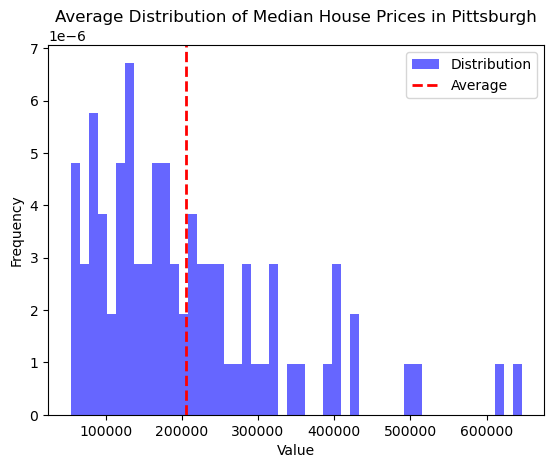

Average median house price: $205907.17


In [16]:
data = list(mean_prices_data.values())

average = np.mean(data)

plt.hist(data, bins=50, density=True, alpha=0.6, color='b', label='Distribution')
plt.axvline(average, color='r', linestyle='dashed', linewidth=2, label='Average')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Average Distribution of Median House Prices in Pittsburgh')
plt.legend()
plt.show()

print(f"Average median house price: ${average:.2f}")

We're not going to use this data in the rankings, however it is fun and important to look at.

We can see that most Pittsburgh neighborhoods fall between 100,000 and 300,000 dollar range. The term "average median house price" might be confusing, but it is just the historical average of median house prices. Why use historical data? While it might seem that using the latest data would be optimal since house prices keep going up, this is a matter of perception and economic trends rather than actual fact. House prices are not guaranteed to always go up and sometimes go down in certain neighborhoods or during economic crisis. Therefore, we accounted the historical average of the past 4 years to get a more accurate result.

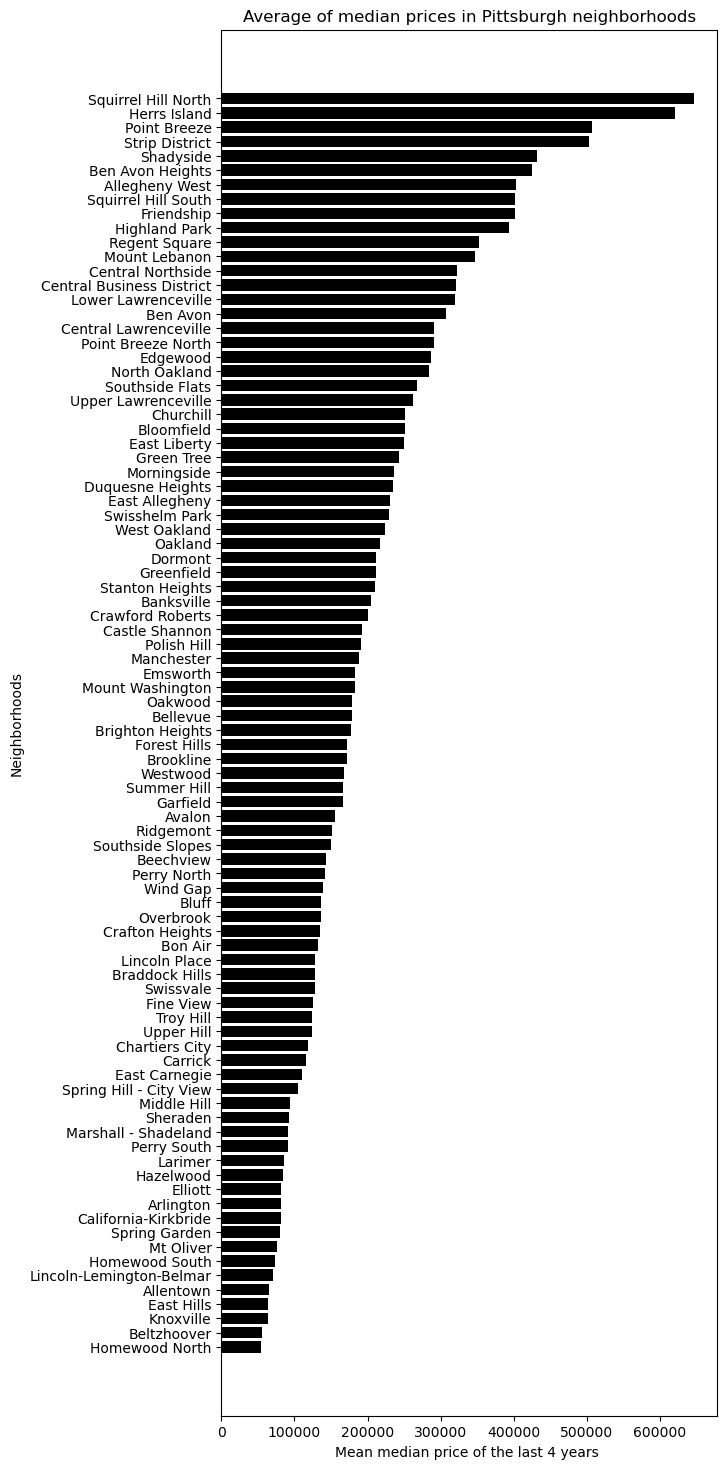

In [17]:
plt.figure().set_figheight(18)

neighborhoods = list(mean_prices_data.keys())
mean_price = list(mean_prices_data.values())

plt.barh(neighborhoods, mean_price, color = "black" )

plt.ylabel("Neighborhoods")
plt.xlabel("Mean median price of the last 4 years ")
plt.title("Average of median prices in Pittsburgh neighborhoods")
plt.show()

Unsurprisingly, Squirell Hill North and Herrs Island are the top of the list by a fair margin. 

If you've ever been to either, you'd quickly know why. Herrs island was only recently developed from an old industrial wasteland to a stunning island with beautiful homes and a marina. Plus a stunning park. 

If affordability is a non-metric, we would recommend using this chart as the ranking guide instead. This fundamentally comes down to ranking the 'best' neighborhood. If a neighborhood has lots of demand, therefore higher average median house prices, then it is likely that this demand is some sort of representation of the qualities that this neighborhood offers. Essentially, money is a representation of what people value. Note that this isn't 100 percent foolproof as value can be arbitrary (i.e an appraiser values an 'artwork' for $2 million) but for properties it generally holds as there are very real factors that weigh into a property's value versus something abstract like stocks or artwork.

## Affordability Rankings

In [18]:
# Grading
affordability_ranks = normalize_dict_values(mean_prices_data)
affordability_ranks

{'Homewood North': 0.9160354599511453,
 'Beltzhoover': 0.913718699340649,
 'Knoxville': 0.9021001248304621,
 'East Hills': 0.9018970849071314,
 'Allentown': 0.8999794065035445,
 'Lincoln-Lemington-Belmar': 0.8914586035113785,
 'Homewood South': 0.8867211859178754,
 'Mt Oliver': 0.8821172343692854,
 'Spring Garden': 0.8748831456087457,
 'California-Kirkbride': 0.8733353977402701,
 'Arlington': 0.8731549453310943,
 'Elliott': 0.8728257775956878,
 'Hazelwood': 0.869629543713017,
 'Larimer': 0.8674170974756354,
 'Perry South': 0.8588369693606176,
 'Marshall - Shadeland': 0.8587254406066966,
 'Sheraden': 0.8575987431991301,
 'Middle Hill': 0.8538584583072573,
 'Spring Hill - City View': 0.837607817837442,
 'East Carnegie': 0.8286811827026768,
 'Carrick': 0.8205211451953276,
 'Chartiers City': 0.8172924775620372,
 'Upper Hill': 0.8085110589336266,
 'Troy Hill': 0.8070553486056924,
 'Fine View': 0.8062714736199509,
 'Swissvale': 0.8025867208824804,
 'Braddock Hills': 0.8025271480555665,
 'Lin

# Crime

In [19]:
citations_data = pd.read_csv('non-traffic-citations.csv')

citations_data.info()
#citations_data.head()

#drop rows with missing OFFENSES or NEIGHBORHOOD data (if applicable)
citations_data = citations_data.dropna(subset=['OFFENSES', 'NEIGHBORHOOD'])

#standardize the OFFENSES column (extract the main offense name before the first parenthesis)
citations_data['MAIN_OFFENSE'] = citations_data['OFFENSES'].str.split().str[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16295 entries, 0 to 16294
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    16295 non-null  int64  
 1   PK                     16295 non-null  int64  
 2   CCR                    16295 non-null  object 
 3   GENDER                 16232 non-null  object 
 4   RACE                   16214 non-null  object 
 5   AGE                    16223 non-null  float64
 6   CITEDTIME              16295 non-null  object 
 7   INCIDENTLOCATION       16295 non-null  object 
 8   OFFENSES               16295 non-null  object 
 9   NEIGHBORHOOD           15379 non-null  object 
 10  ZONE                   16295 non-null  object 
 11  INCIDENTTRACT          15383 non-null  object 
 12  COUNCIL_DISTRICT       14453 non-null  float64
 13  PUBLIC_WORKS_DIVISION  14453 non-null  float64
 14  X                      14493 non-null  float64
 15  Y 

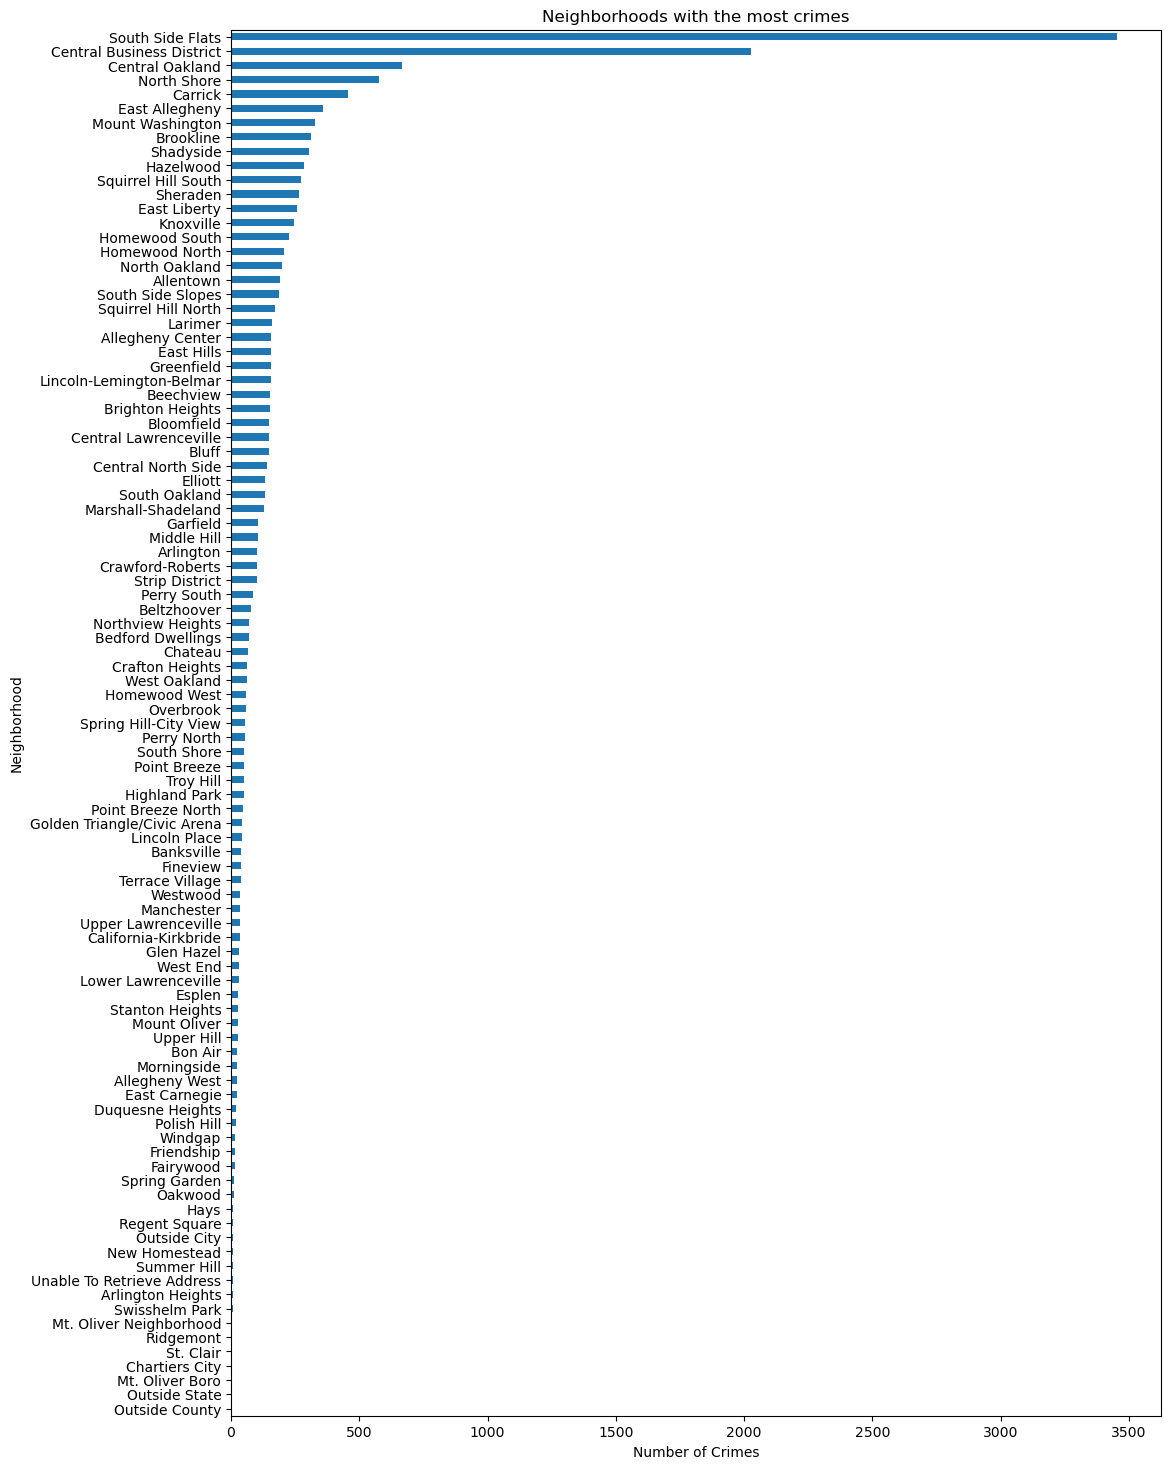

In [20]:
#count crimes by neighborhood


crime_counts_by_neighborhood = citations_data.groupby('NEIGHBORHOOD')['OFFENSES'].count().sort_values(ascending=True)

#count crimes by offense type
offense_counts = citations_data['MAIN_OFFENSE'].value_counts()

#plot crimes by neighborhood
crime_counts_by_neighborhood.plot(
    kind='barh',
    figsize=(12, 18),
    title='Neighborhoods with the most crimes'
)
plt.ylabel('Neighborhood')
plt.xlabel('Number of Crimes')
plt.show()


The crime dataset is a bit tricky since it works by citations. As you can see below, majority of crimes are things like public, disorderly conduct, and generic crimes. The trickiness of this data set is it is difficult to gauge the seriousness of crimes. For example, South Side Flats is by far the neighborhood with the most crimes. You'd assume on first sight that it is a very dangerous neighborhood. However, because the seriousness of the crimes is not considered, this is not the case. South Side Flats has lots of bars and restaurants and is generally a bustling part of the city. Lots of these citations could be drunk people doing drunk people things and are generally not indicative of true crime. This dataset does not offer distinctions between violent and non violent crimes, making it difficult to arrive to a decisive conclusion.

We decided to keep this dataset as crime in general is an important factor when considering a neighborhood but we recommend taking these numbers with a grain of salt.

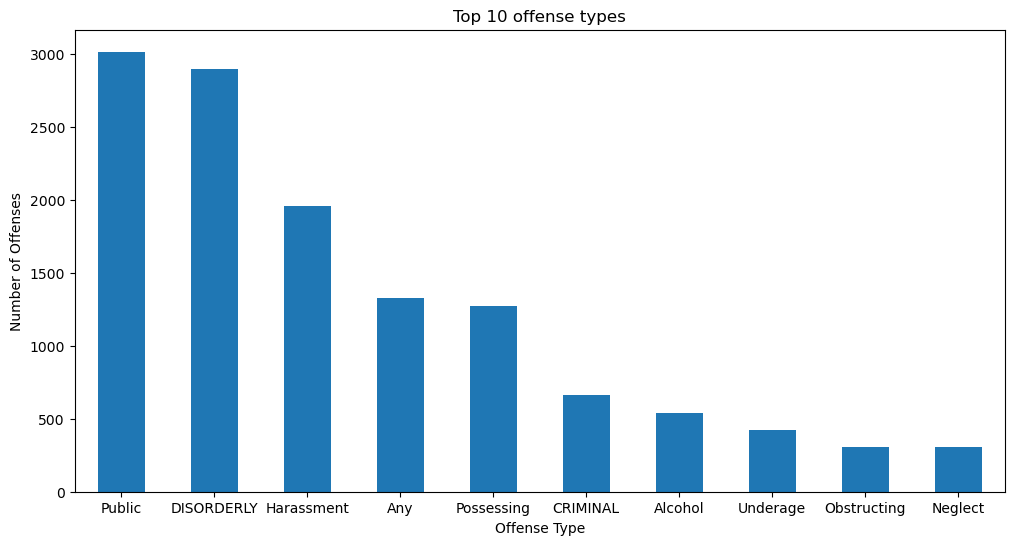

In [21]:
#plot top 10 offense types
offense_counts.head(10).plot(
    kind='bar',
    figsize=(12, 6),
    title='Top 10 offense types'
)

plt.xticks(rotation=0)

plt.xlabel('Offense Type')
plt.ylabel('Number of Offenses')
plt.show()


## Crime rankings

In [22]:
# Grading

ccounts = OrderedDict(sorted(crime_counts_by_neighborhood.to_dict().items(), key=lambda item: item[1]))

# Filter out garbage data
del ccounts["Outside County"]
del ccounts["Outside State"]
del ccounts["Unable To Retrieve Address"]

crime_ranks = normalize_dict_values(ccounts)

crime_ranks


{'Mt. Oliver Boro': 0.9991311902693311,
 'Chartiers City': 0.9991311902693311,
 'St. Clair': 0.9991311902693311,
 'Ridgemont': 0.9988415870257746,
 'Mt. Oliver Neighborhood': 0.9988415870257746,
 'Swisshelm Park': 0.998262380538662,
 'Arlington Heights': 0.9979727772951057,
 'Summer Hill': 0.9979727772951057,
 'New Homestead': 0.9976831740515494,
 'Outside City': 0.9973935708079931,
 'Regent Square': 0.9973935708079931,
 'Hays': 0.9973935708079931,
 'Oakwood': 0.9971039675644368,
 'Spring Garden': 0.9971039675644368,
 'Fairywood': 0.9959455545902114,
 'Friendship': 0.9950767448595425,
 'Windgap': 0.9950767448595425,
 'Polish Hill': 0.9947871416159861,
 'Duquesne Heights': 0.9939183318853171,
 'East Carnegie': 0.9936287286417608,
 'Allegheny West': 0.9930495221546481,
 'Morningside': 0.9930495221546481,
 'Bon Air': 0.9927599189110918,
 'Upper Hill': 0.9924703156675355,
 'Mount Oliver': 0.9918911091804228,
 'Stanton Heights': 0.9918911091804228,
 'Esplen': 0.9916015059368665,
 'Lower Law

# Mobility

In [23]:
traffic_data = pd.read_csv('traffic-count-data.csv')

traffic_data.info()
#traffic_data.head()

#clean the data
#convert average_daily_car_traffic to numeric, coercing errors to NaN
traffic_data['average_daily_car_traffic'] = pd.to_numeric(traffic_data['average_daily_car_traffic'], errors='coerce')

#drop rows with missing or invalid traffic data
traffic_data = traffic_data.dropna(subset=['average_daily_car_traffic'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         420 non-null    int64  
 1   id                          420 non-null    int64  
 2   device_id                   420 non-null    int64  
 3   record_oid                  375 non-null    float64
 4   count_start_date            367 non-null    object 
 5   count_end_date              335 non-null    object 
 6   average_daily_car_traffic   286 non-null    float64
 7   average_daily_bike_traffic  7 non-null      float64
 8   counter_number              268 non-null    object 
 9   counter_type                364 non-null    object 
 10  speed_limit                 261 non-null    float64
 11  max_speed                   91 non-null     float64
 12  median_speed                298 non-null    float64
 13  percent_over_limit          241 non

In [24]:
#group by neighborhood and find the minimum average daily car traffic
min_traffic_by_neighborhood = traffic_data.groupby('neighborhood')['average_daily_car_traffic'].min()

#sort the results to identify neighborhoods with the least traffic
min_traffic_sorted = min_traffic_by_neighborhood.sort_values()

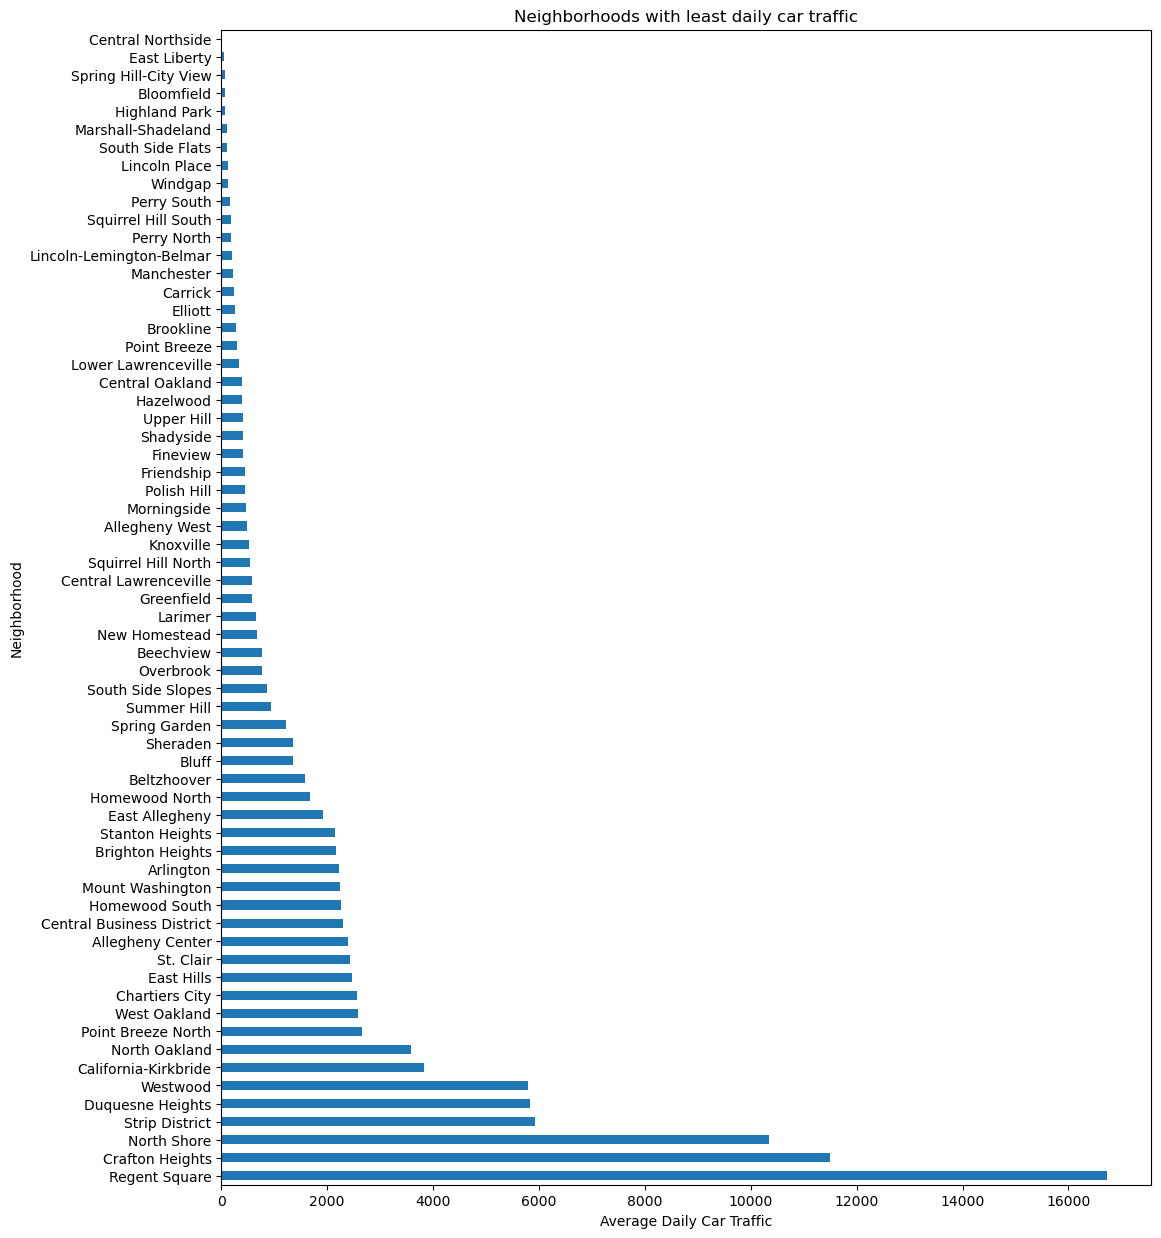

In [25]:
#plot the top neighborhoods with the least daily car traffic
min_traffic_sorted.plot(
    kind='barh',
    figsize=(12, 15),
    title='Neighborhoods with least daily car traffic'
)
plt.xlabel('Average Daily Car Traffic')
plt.ylabel('Neighborhood')
plt.gca().invert_yaxis() #invert y-axis for better readability
plt.show()

Traffic count is also a bit of a tricky dataset since it includes the traffic on the highways that traverse through those neighborhoods. For example, Regent Square is not an ultra car dependent hell-hole like this chart would suggest. It is rather a pleasant neighborhood that is walkable and has access to Frick park. Unfortunately, it also houses the 376 highway which bears lots of traffic in and out of the city. I personally was stuck in traffic for 30 minutes entering Pittsburgh on the 376, so I understand the chart.

## Mobility Rankings

In [26]:
# Grading
mobility_ranks = normalize_dict_values(min_traffic_sorted.to_dict())
mobility_ranks

{'Central Northside': 0.9986251419690358,
 'East Liberty': 0.9965329667045251,
 'Spring Hill-City View': 0.9962340845238807,
 'Bloomfield': 0.9953972144180764,
 'Highland Park': 0.9952776615458186,
 'Marshall-Shadeland': 0.9934843684619523,
 'South Side Flats': 0.993125709845179,
 'Lincoln Place': 0.9924681690477614,
 'Windgap': 0.992169286867117,
 'Perry South': 0.9906150995277662,
 'Squirrel Hill South': 0.9895391236774463,
 'Perry North': 0.9894195708051886,
 'Lincoln-Lemington-Belmar': 0.9883435949548688,
 'Manchester': 0.986729631179389,
 'Carrick': 0.9856536553290692,
 'Elliott': 0.9842787972981051,
 'Brookline': 0.9834419271923008,
 'Point Breeze': 0.9817681869806922,
 'Lower Lawrenceville': 0.9800346703329548,
 'Central Oakland': 0.9771654013987686,
 'Hazelwood': 0.9763285312929643,
 'Upper Hill': 0.9759100962400622,
 'Shadyside': 0.9751330025703867,
 'Fineview': 0.9749536732620001,
 'Friendship': 0.9737581445394226,
 'Polish Hill': 0.9731006037420049,
 'Morningside': 0.9723832

# Results

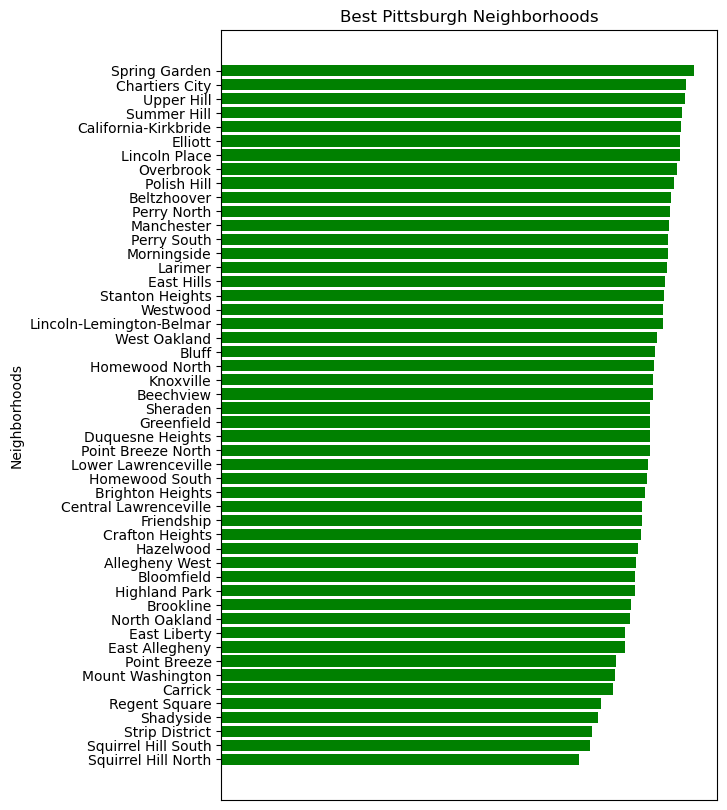

In [27]:
# Get all the common neighborhoods across the datasets
nbs = set.intersection(set(list(fire_ranks.keys())), set(list(fire_ranks_per_capita.keys())), set(list(affordability_ranks.keys())), set(list(crime_ranks.keys())), set(list(mobility_ranks.keys())))

overall_rank = {}
for n in nbs:
    fire_avg = ((fire_ranks[n] + fire_ranks_per_capita[n]) / 2) * weights["fire"]
    affordability_avg = affordability_ranks[n] * weights["affordability"]
    crime_avg = crime_ranks[n] * weights["crime"]
    mobility_avg = mobility_ranks[n] * weights["mobility"]

    # print(n, fire_avg, affordability_avg, crime_avg, mobility_avg)


    overall_rank[n] = (fire_avg + affordability_avg + crime_avg + mobility_avg) / 4



plt.figure().set_figheight(10)

overall_rank = OrderedDict(sorted(overall_rank.items(), key=lambda item: item[1]))


ns = list(overall_rank.keys())
rank = list(overall_rank.values())



plt.barh(ns, rank, color = "green")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False
)

plt.ylabel("Neighborhoods")
plt.title("Best Pittsburgh Neighborhoods")
plt.show()


Overall, according to our grading scheme, **Spring Garden** is the best neighborhood in Pittsburgh!

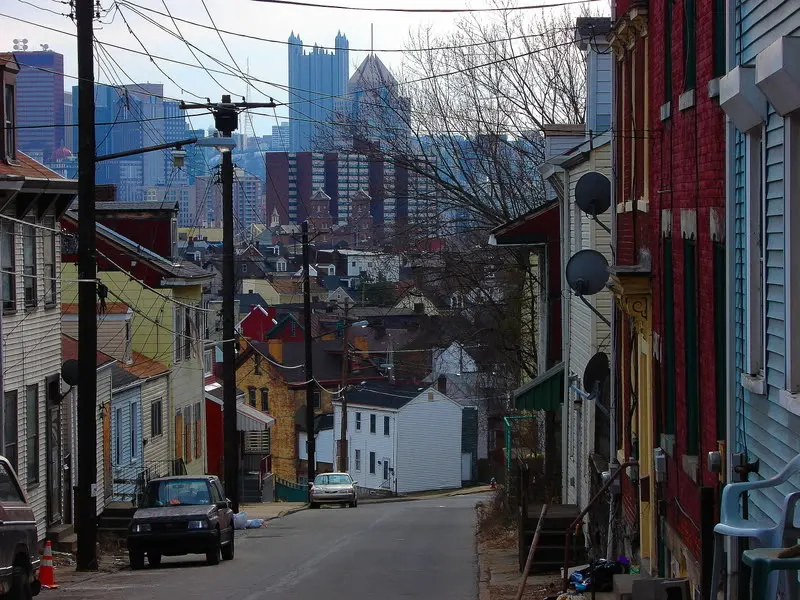

## Data is nothing without **Context**

As we explored different datasets, we realized that there are different flaws and considerations that needed to be accounted for. All data needs to be analyzed carefully and with suspicion. We cross checked our results with personal experiences and external sources. Some things just did not match what the data was telling us and we 
researched and came up with explanations. 

Sometimes human perception and bias can play a key role in what we see as 'best.' Sometimes the data we seek to justify our biases is conflicting or not the data we need. Simply put, choosing the best neighborhood is complicated and personal.

We would recommend reading through the whole analysis and trying to visit neighborhoods if possible. There are certain things that can't or weren't captured in a dataset.

One thing that we did observe is how close the rankings were across our criteria. This just goes to show that overall qualities vary little by neighborhood. When talking purely numbers, one factor can cancel out another one, leading to a pretty homogenous ranking. This was a fun journey that left us with open ended results and really led us to understand the realities of Pittsburgh neighborhoods.